In [1]:
import os
import sys
sys.path.append("../src/")
import argparse
import pandas as pd

from sklearn.metrics import mean_absolute_error

from utils import *
from preprocess import PreProcessor
# from model import Model, OptunaProcessor

X_train, y_train, X_valid, y_valid = load_dataset(mode='train')
# categorical_feature = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG', 'BREADTH', 'DEPTH', 'DRAUGHT', 'year']
# minmaxscale_feature = ['DIST', 'BUILT', 'DEADWEIGHT', 'GT', 'LENGTH', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE']

# y_pred = pd.Series(name="CI_HOUR")
    
# ## preprocess data set
# preprocessing = PreProcessor(categorical_feature=categorical_feature, minmaxscale_feature=minmaxscale_feature)
# mean_values_train = preprocessing.nan_mean_fit(X_train)

# X_train = preprocessing.preprocess(X_train, method='mean', mean_values=mean_values_train)
# X_valid = preprocessing.preprocess(X_valid, method='mean', mean_values=mean_values_train)

# encoder_dict = preprocessing.categorical_process_fit(X_train)
# scaler = preprocessing.minmaxscale_process_fit(X_train)

# X_train = preprocessing.transform(X_train, encoder=encoder_dict, scaler=scaler)
# X_valid = preprocessing.transform(X_valid, encoder=encoder_dict, scaler=scaler)

# X_train, y_train = reset_data(X_train, y_train)
# X_valid, y_valid = reset_data(X_valid, y_valid)

In [2]:
categorical_feature = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG', 'BREADTH', 'DEPTH', 'DRAUGHT', 'year']
minmaxscale_feature = ['DIST', 'BUILT', 'DEADWEIGHT', 'GT', 'LENGTH', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE']

# preprocessing = PreProcessor(categorical_feature=categorical_feature, minmaxscale_feature=minmaxscale_feature)
# X_train = preprocessing.date_process(X_train)

In [3]:
X_train.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA', 'ID',
       'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE'],
      dtype='object')

In [4]:
# import numpy as np
# import math
# ## 풍속 계산
# wind_speed = np.sqrt((X_train['U_WIND']*3.6)**2 + (X_train['V_WIND']*3.6)**2)

# ## 풍향 계산
# def make_wind_direction(row_vector):
#     theta = np.nan
#     if (row_vector['U_WIND'] > 0) and (row_vector['V_WIND'] < 0):
#         theta = math.atan(row_vector['U_WIND']/row_vector['V_WIND']) * 180/np.pi + 360
#     elif (row_vector['U_WIND'] < 0) and (row_vector['V_WIND'] < 0):
#         theta = math.atan(row_vector['U_WIND']/row_vector['V_WIND']) * 180/np.pi
#     elif (row_vector['U_WIND'] < 0) and (row_vector['V_WIND'] > 0):
#         theta = math.atan(row_vector['U_WIND']/row_vector['V_WIND']) * 180/np.pi + 180  
#     elif row_vector['U_WIND'] == 0:
#         if row_vector['V_WIND'] > 0: theta = 180
#         elif row_vector['V_WIND'] < 0: theta = 0
#     elif row_vector['V_WIND'] == 0:
#         if row_vector['U_WIND'] > 0: theta = 270
#         elif row_vector['U_WIND'] < 0: theta = 9    
#     return theta

# wind_direction = X_train[['U_WIND', 'V_WIND']].apply(lambda x : make_wind_direction(x), axis=1)

In [5]:
# wind_speed.isnull().sum()
# wind_direction.isnull().sum()

In [6]:
# wind_speed.name = 'wind_speed'
# wind_direction.name = 'wind_direction'

In [7]:
# ARI_CO_list = X_train['ARI_CO'].unique()
# ARI_PO_list = X_train['ARI_PO'].unique()

In [8]:
# def replace_continuous_zeros_with_nan(input_list):
#     result = []
#     consecutive_zeros = 0
    
#     for value in input_list:
#         if value == 0:
#             consecutive_zeros += 1
#             if consecutive_zeros <= 2:
#                 result.append(value)  # 연속된 최대 2개의 0은 유효한 값으로 처리
#             else:
#                 result.append(None)  # 연속된 3개 이상의 0은 결측치로 처리
#         else:
#             consecutive_zeros = 0  # 0 아닌 값이 나오면 연속된 0 카운트 초기화
#             result.append(value)
    
#     return result



In [9]:
# for 
# replace_continuous_zeros_with_nan

In [10]:
# X_train[(X_train['U_WIND'] == 0) & (X_train['V_WIND'] == 0)]

In [11]:
# X_train[['U_WIND', 'V_WIND']].groupby(by='ARI_CO')

In [12]:
# for co in ARI_CO_list:
#     print(f"     ## {co}")
#     print(X_train[X_train['ARI_CO'] == co]['ARI_PO'].unique())
#     print(len(X_train[X_train['ARI_CO'] == co]['ARI_PO'].unique()))

https://ko.weatherspark.com/download/20441/%ED%8E%98%EB%A3%A8-%EB%A6%AC%EB%A7%88%EC%9D%98-%EA%B8%B0%ED%9B%84-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C

In [21]:
import numpy as np
## fitting
ARI_CO_uniq = X_train['ARI_CO'].unique()
ARI_PO_uniq = X_train['ARI_PO'].unique()

co_mean_value = {}
po_mean_value = {}

print(X_train.isnull().sum())
for co in ARI_CO_uniq:
    co_mean_value[co] = X_train.loc[X_train['ARI_CO']==co, ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].apply(lambda x : np.mean(x))
    
for po in ARI_PO_uniq:
    po_mean_value[po] = X_train.loc[X_train['ARI_PO']==po, ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].apply(lambda x : np.mean(x))
    
area_mean_value = {'co' : co_mean_value, 
                   'po' : po_mean_value}

## replace
for po in area_mean_value['po'].keys():
    X_train.loc[X_train['ARI_PO'] == po, ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']] = X_train.loc[X_train['ARI_PO'] == po, ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].fillna(area_mean_value['po'][po])

if len(X_train[X_train[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1)]) != 0:
    nan_data = X_train[X_train[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1)].copy()
    nan_data_co_list = nan_data['ARI_CO'].unique()
    for co in nan_data_co_list:
        X_train[(X_train['ARI_CO'] == co) & (X_train[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1))] = X_train[(X_train['ARI_CO'] == co) & (X_train[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1))].fillna(area_mean_value['co'][co])
    
print(X_train.isnull().sum())

ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                4
V_WIND                4
AIR_TEMPERATURE       4
BN                    4
ATA_LT                0
DUBAI                 0
BRENT                 0
WTI                   0
BDI_ADJ               0
PORT_SIZE             0
dtype: int64


In [22]:
print(X_train.isnull().sum())

ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
DUBAI                 0
BRENT                 0
WTI                   0
BDI_ADJ               0
PORT_SIZE             0
dtype: int64


In [25]:
print(X_valid.isnull().sum())
for po in area_mean_value['po'].keys():
    X_valid.loc[X_valid['ARI_PO'] == po, ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']] = X_valid.loc[X_valid['ARI_PO'] == po, ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].fillna(area_mean_value['po'][po])

if len(X_valid[X_valid[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1)]) != 0:
    nan_data = X_valid[X_valid[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1)].copy()
    nan_data_co_list = nan_data['ARI_CO'].unique()
    for co in nan_data_co_list:
        X_valid[(X_valid['ARI_CO'] == co) & (X_valid[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1))] = X_valid[(X_valid['ARI_CO'] == co) & (X_valid[['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].isna().any(axis=1))].fillna(area_mean_value['co'][co])
print(X_valid.isnull().sum())

ARI_CO                    0
ARI_PO                    0
SHIP_TYPE_CATEGORY        0
DIST                      0
ATA                       0
ID                        0
BREADTH                   1
BUILT                     0
DEADWEIGHT                0
DEPTH                     1
DRAUGHT                   1
GT                        0
LENGTH                    1
SHIPMANAGER               0
FLAG                      0
U_WIND                46105
V_WIND                46105
AIR_TEMPERATURE       46344
BN                    46105
ATA_LT                    0
DUBAI                     0
BRENT                     0
WTI                       0
BDI_ADJ                   0
PORT_SIZE                 0
dtype: int64
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               1
BUILT                 0
DEADWEIGHT            0
DEPTH                 1
DRAUGHT               1
GT                    0

In [17]:
X_valid[X_valid['ARI_PO'] == "RGT8"]

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE
33995,CN,RGT8,Bulk,0.0,2017-05-29 13:07,G463522,10.0,32,3680,10.0,...,NaN,NaN,NaN,NaN,21,50.65,52.29,49.80,877.295979,0.000026
71506,CN,RGT8,Bulk,0.0,2017-10-30 6:04,G512525,20.0,13,5150,10.0,...,NaN,NaN,NaN,NaN,14,58.33,60.90,54.15,1459.939122,0.000026


In [123]:
po_mean_value[po]

U_WIND             -0.051818
V_WIND             -0.109091
AIR_TEMPERATURE    25.736364
BN                  0.968563
dtype: float64

In [ ]:
if X_train.loc[X_train.]

In [128]:
X_train.loc[X_train['ARI_PO'] == 'HYV6', ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']]

,U_WIND,V_WIND,AIR_TEMPERATURE,BN
0,NaN,NaN,NaN,NaN
864,NaN,NaN,NaN,NaN
1664,0.00,0.00,24.9,0.000000
1797,NaN,NaN,NaN,NaN
3572,NaN,NaN,NaN,NaN
...,...,...,...,...
255274,NaN,NaN,NaN,NaN
255354,0.56,1.04,15.5,1.259142
255611,0.00,0.00,22.8,0.000000
255627,0.21,1.28,23.0,1.340235


In [127]:
X_train.loc[X_train['ARI_PO'] == 'HYV6', ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']].fillna(po_mean_value['HYV6'])

,U_WIND,V_WIND,AIR_TEMPERATURE,BN
0,1.049529,1.940628,20.411579,1.832505
864,1.049529,1.940628,20.411579,1.832505
1664,0.000000,0.000000,24.900000,0.000000
1797,1.049529,1.940628,20.411579,1.832505
3572,1.049529,1.940628,20.411579,1.832505
...,...,...,...,...
255274,1.049529,1.940628,20.411579,1.832505
255354,0.560000,1.040000,15.500000,1.259142
255611,0.000000,0.000000,22.800000,0.000000
255627,0.210000,1.280000,23.000000,1.340235


In [117]:
len(X_train.ARI_PO.unique())

103

In [116]:
len(X_valid.ARI_PO.unique())

103

In [120]:
len(set(X_train.ARI_PO.unique()) & set(X_valid.ARI_PO.unique()))

103

In [113]:
po_mean_value

{'HYV6': U_WIND              1.049529
 V_WIND              1.940628
 AIR_TEMPERATURE    20.411579
 BN                  1.832505
 dtype: float64,
 'KSF1': U_WIND             -1.691347
 V_WIND              0.975737
 AIR_TEMPERATURE    22.171149
 BN                  2.327445
 dtype: float64,
 'TYY2': U_WIND             -0.965091
 V_WIND              0.754022
 AIR_TEMPERATURE    10.191257
 BN                  2.364017
 dtype: float64,
 'EUC8': U_WIND             -1.035900
 V_WIND             -0.126323
 AIR_TEMPERATURE    17.693088
 BN                  3.205120
 dtype: float64,
 'GIW5': U_WIND             -0.517724
 V_WIND             -0.096957
 AIR_TEMPERATURE    27.607805
 BN                  2.011582
 dtype: float64,
 'NGG6': U_WIND             -0.827183
 V_WIND             -0.047780
 AIR_TEMPERATURE    17.406584
 BN                  2.242297
 dtype: float64,
 'JEN5': U_WIND              0.159444
 V_WIND              0.582435
 AIR_TEMPERATURE    13.165933
 BN                  3.205533
 d

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
14890          0.0     AU   KSF1     0.0     0.0 2020-10-22 13:57:00
108790         0.0     AU   KSF1     0.0     0.0 2020-10-23 09:35:00
208836         0.0     AU   KSF1     0.0     0.0 2021-02-02 15:41:00
107744         0.0     AU   KSF1     0.0     0.0 2022-04-08 06:54:00


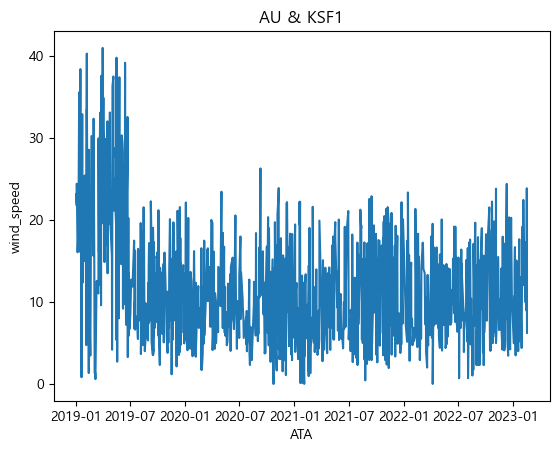

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
205318         0.0     AU   WHH4     0.0     0.0 2019-01-09 19:58:00
27374          0.0     AU   WHH4     0.0     0.0 2019-01-11 07:40:00
143302         0.0     AU   WHH4     0.0     0.0 2019-01-15 04:38:00
151322         0.0     AU   WHH4     0.0     0.0 2019-01-16 19:35:00
105768         0.0     AU   WHH4     0.0     0.0 2019-01-18 08:01:00
...            ...    ...    ...     ...     ...                 ...
128180         0.0     AU   WHH4     0.0     0.0 2021-02-10 15:31:00
168761         0.0     AU   WHH4     0.0     0.0 2021-03-03 01:05:00
92945          0.0     AU   WHH4     0.0     0.0 2021-03-04 13:35:00
148702         0.0     AU   WHH4     0.0     0.0 2022-01-22 09:36:00
15458          0.0     AU   WHH4     0.0     0.0 2022-01-23 20:07:00

[351 rows x 6 columns]


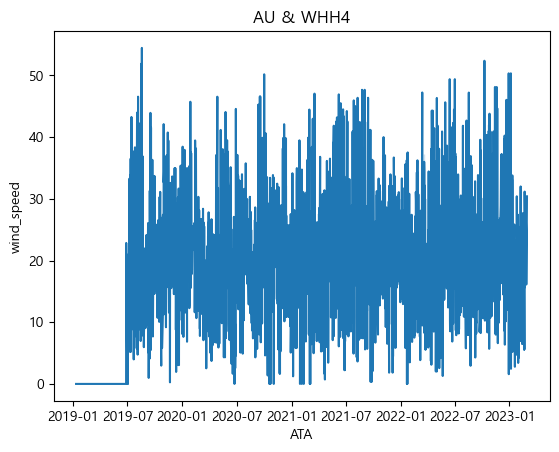

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
93682          0.0     AU   AIB7     0.0     0.0 2019-04-02 14:31:00
165622         0.0     AU   AIB7     0.0     0.0 2019-05-27 11:47:00
209874         0.0     AU   AIB7     0.0     0.0 2020-10-19 18:11:00
45088          0.0     AU   AIB7     0.0     0.0 2021-02-04 09:31:00
105319         0.0     AU   AIB7     0.0     0.0 2021-02-08 10:41:00
169048         0.0     AU   AIB7     0.0     0.0 2021-02-08 14:58:00
60396          0.0     AU   AIB7     0.0     0.0 2021-02-10 05:04:00
178147         0.0     AU   AIB7     0.0     0.0 2022-01-26 04:26:00


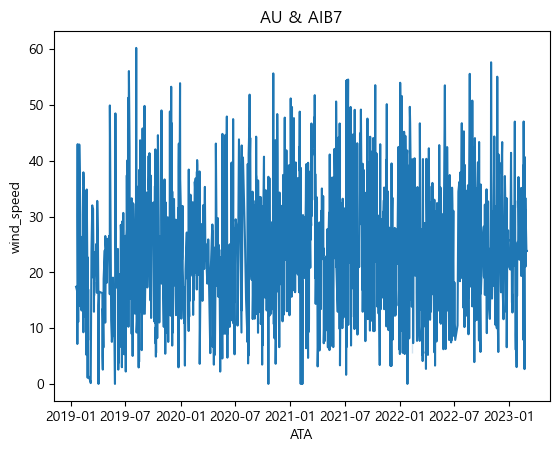

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
20373          0.0     AU   NQO4     0.0     0.0 2019-01-04 07:57:00
7659           0.0     AU   NQO4     0.0     0.0 2019-01-15 23:21:00
69590          0.0     AU   NQO4     0.0     0.0 2019-01-16 03:29:00
190160         0.0     AU   NQO4     0.0     0.0 2019-01-16 13:28:00
213341         0.0     AU   NQO4     0.0     0.0 2019-01-21 23:56:00
...            ...    ...    ...     ...     ...                 ...
61099          0.0     AU   NQO4     0.0     0.0 2020-11-02 19:41:00
15018          0.0     AU   NQO4     0.0     0.0 2020-11-03 00:40:00
10496          0.0     AU   NQO4     0.0     0.0 2021-02-11 20:35:00
168191         0.0     AU   NQO4     0.0     0.0 2021-03-03 13:06:00
163460         0.0     AU   NQO4     0.0     0.0 2022-01-02 01:25:00

[133 rows x 6 columns]


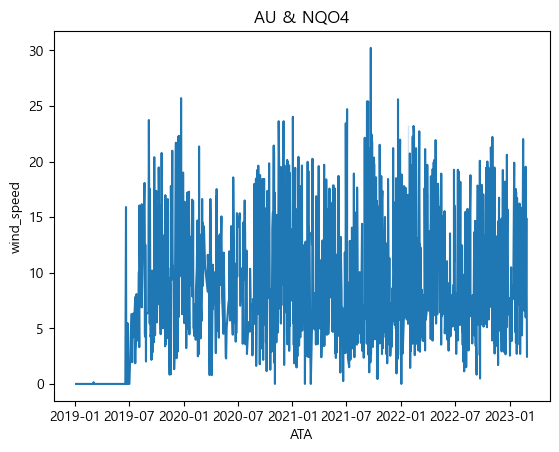

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
114639         0.0     AU   TBL3     0.0     0.0 2021-02-02 08:39:00


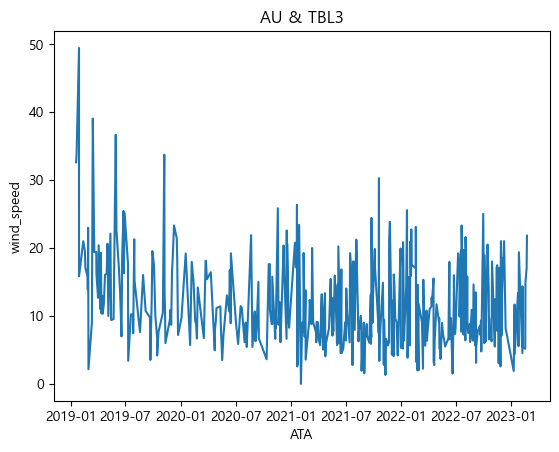

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
129694         0.0     AU   YDP4     0.0     0.0 2019-03-04 16:28:00
113399         0.0     AU   YDP4     0.0     0.0 2020-10-25 10:09:00
40597          0.0     AU   YDP4     0.0     0.0 2021-03-01 17:33:00
217982         0.0     AU   YDP4     0.0     0.0 2021-03-01 22:06:00
7356           0.0     AU   YDP4     0.0     0.0 2022-04-18 16:48:00


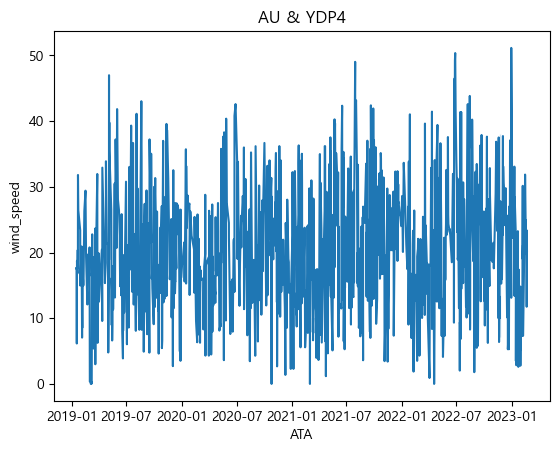

       wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
78964         0.0     AU   WXQ2     0.0     0.0 2021-02-04 19:09:00


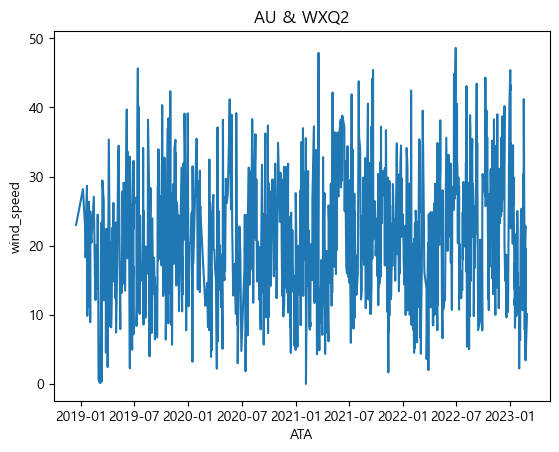

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
176733         0.0     AU   QGL7     0.0     0.0 2018-12-15 03:00:00
109263         0.0     AU   QGL7     0.0     0.0 2019-01-01 21:47:00
45026          0.0     AU   QGL7     0.0     0.0 2019-01-09 15:13:00
108438         0.0     AU   QGL7     0.0     0.0 2019-01-10 13:57:00
182011         0.0     AU   QGL7     0.0     0.0 2019-01-14 19:06:00
121003         0.0     AU   QGL7     0.0     0.0 2019-01-19 23:15:00
76372          0.0     AU   QGL7     0.0     0.0 2019-01-20 21:24:00
118935         0.0     AU   QGL7     0.0     0.0 2019-02-01 04:11:00
178712         0.0     AU   QGL7     0.0     0.0 2019-02-10 19:42:00
94976          0.0     AU   QGL7     0.0     0.0 2019-02-13 05:32:00
20723          0.0     AU   QGL7     0.0     0.0 2019-02-14 07:40:00
133204         0.0     AU   QGL7     0.0     0.0 2019-02-18 01:28:00
253012         0.0     AU   QGL7     0.0     0.0 2019-02-18 05:35:00
173766         0.0     AU   QGL7  

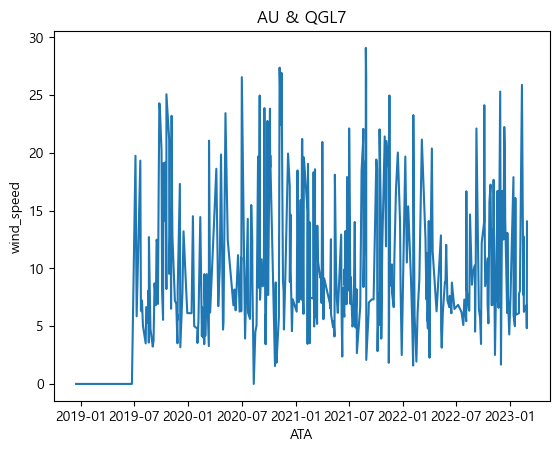

Empty DataFrame
Columns: [wind_speed, ARI_CO, ARI_PO, U_WIND, V_WIND, ATA]
Index: []


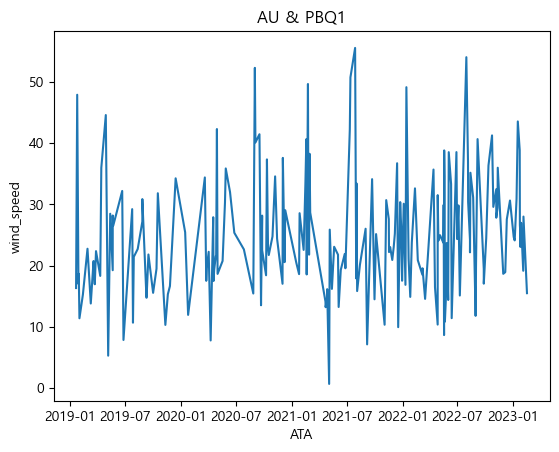

        wind_speed ARI_CO ARI_PO  U_WIND  V_WIND                 ATA
27220          0.0     AU   PDL4     0.0     0.0 2019-01-23 00:11:00
207885         0.0     AU   PDL4     0.0     0.0 2019-02-18 03:19:00
192860         0.0     AU   PDL4     0.0     0.0 2019-04-29 12:58:00


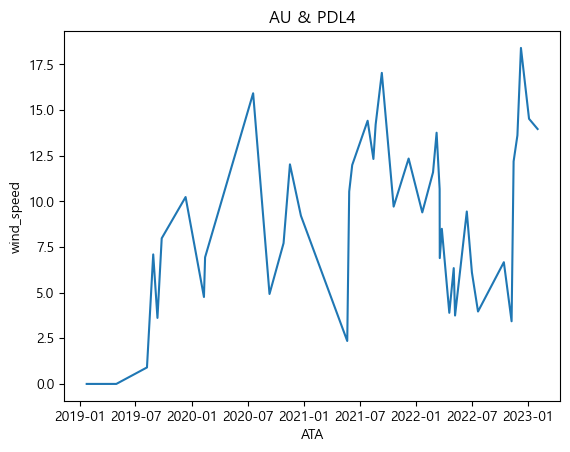

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# def visual_wind_speed(co):
ARI_PO_list = X_train[X_train['ARI_CO'] == co]['ARI_PO'].unique()
for po in ARI_PO_list:
    _ = pd.concat([wind_speed, X_train[['ARI_CO', 'ARI_PO', 'U_WIND', 'V_WIND', 'ATA']]], axis=1)
    _['ATA'] = pd.to_datetime(_['ATA'])
    for_visual = _[(_['ARI_CO'] == co) & (_["ARI_PO"] == po)].sort_values(by='ATA')
    print(for_visual[for_visual['wind_speed'] == 0])
    sns.lineplot(data=for_visual, x='ATA', y='wind_speed')
    # sns.lineplot(data=for_visual, x='ATA', y='U_WIND')
    # sns.lineplot(data=for_visual, x='ATA', y='V_WIND')
    plt.title(f"{co} & {po}")
    plt.show()

In [89]:
for_visual[for_visual['wind_speed'] == 0]

,wind_speed,ARI_CO,ARI_PO,U_WIND,V_WIND,ATA
27220,0.0,AU,PDL4,0.0,0.0,2019-01-23 00:11:00
207885,0.0,AU,PDL4,0.0,0.0,2019-02-18 03:19:00
192860,0.0,AU,PDL4,0.0,0.0,2019-04-29 12:58:00


In [90]:
for_visual[for_visual['wind_speed'].isnull()]

,wind_speed,ARI_CO,ARI_PO,U_WIND,V_WIND,ATA
62757,NaN,AU,PDL4,NaN,NaN,2014-09-01 17:09:00
84999,NaN,AU,PDL4,NaN,NaN,2014-09-30 01:48:00
72062,NaN,AU,PDL4,NaN,NaN,2014-12-11 10:56:00
33158,NaN,AU,PDL4,NaN,NaN,2014-12-17 19:08:00
73764,NaN,AU,PDL4,NaN,NaN,2015-01-08 05:42:00
11291,NaN,AU,PDL4,NaN,NaN,2015-01-13 00:35:00
68909,NaN,AU,PDL4,NaN,NaN,2015-03-09 22:00:00
149522,NaN,AU,PDL4,NaN,NaN,2015-06-21 14:05:00
233392,NaN,AU,PDL4,NaN,NaN,2015-08-04 09:22:00
59163,NaN,AU,PDL4,NaN,NaN,2015-09-23 06:41:00


In [93]:
for_visual.iloc[0:len(for_visual[for_visual['wind_speed'].isnull()]), :]

,wind_speed,ARI_CO,ARI_PO,U_WIND,V_WIND,ATA
62757,NaN,AU,PDL4,NaN,NaN,2014-09-01 17:09:00
84999,NaN,AU,PDL4,NaN,NaN,2014-09-30 01:48:00
72062,NaN,AU,PDL4,NaN,NaN,2014-12-11 10:56:00
33158,NaN,AU,PDL4,NaN,NaN,2014-12-17 19:08:00
73764,NaN,AU,PDL4,NaN,NaN,2015-01-08 05:42:00
11291,NaN,AU,PDL4,NaN,NaN,2015-01-13 00:35:00
68909,NaN,AU,PDL4,NaN,NaN,2015-03-09 22:00:00
149522,NaN,AU,PDL4,NaN,NaN,2015-06-21 14:05:00
233392,NaN,AU,PDL4,NaN,NaN,2015-08-04 09:22:00
59163,NaN,AU,PDL4,NaN,NaN,2015-09-23 06:41:00
